In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score

In [14]:
all_data = {'all_idle':'idle', 'all_running':'running', 'all_stairs':'stairs', 'all_walking':'walking'}

for j in all_data:
    df = pd.DataFrame(pd.read_csv(f'{j}.csv'))
    # Параметри для розділення на сегменти
    segment_length = 5  # Задаємо довжину сегменту вимірів

    # Розділяємо дані на сегменти для кожної активності
    segments = []

    for activity, group in df.groupby('activity'):
        activity_segments = [group.iloc[i:i+segment_length] for i in range(0, len(group), segment_length)]
        segments.extend(activity_segments)

    # Розрахунок часових ознак для кожного сегмента
    time_features_list = []

    for segment in segments:
        time_diff = segment.index[-1] - segment.index[0]  # Обчислення часового інтервалу для сегмента
        time_diff_seconds = time_diff.total_seconds() if hasattr(time_diff, 'total_seconds') else 0
        mean_values = segment[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].mean()
        std_values = segment[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].std()
        max_values = segment[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].max()
        min_values = segment[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].min()


        features = {
            'mean_accelerometer_X': mean_values['accelerometer_X'],
            'mean_accelerometer_Y': mean_values['accelerometer_Y'],
            'mean_accelerometer_Z': mean_values['accelerometer_Z'],
            'std_accelerometer_X': std_values['accelerometer_X'],
            'std_accelerometer_Y': std_values['accelerometer_Y'],
            'std_accelerometer_Z': std_values['accelerometer_Z'],
            'max_accelerometer_X': max_values['accelerometer_X'],
            'max_accelerometer_Y': max_values['accelerometer_Y'],
            'max_accelerometer_Z': max_values['accelerometer_Z'],
            'min_accelerometer_X': min_values['accelerometer_X'],
            'min_accelerometer_Y': min_values['accelerometer_Y'],
            'min_accelerometer_Z': min_values['accelerometer_Z'],
            'time_diff': time_diff_seconds  # Перетворення часового інтервалу в секунди
        }

        time_features_list.append(features)

    # Створення DataFrame з часовими ознаками
    time_features_df = pd.DataFrame(time_features_list)
    time_features_df.to_csv(f'{j}_tfd.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'all_idle.csv'

In [15]:
all_data_tfd = {'all_idle_tfd.csv':'idle', 'all_running_tfd.csv':'running', 'all_stairs_tfd.csv':'stairs', 'all_walking_tfd.csv':'walking'}
for i in all_data_tfd:
    df = pd.DataFrame(pd.read_csv(i))
    df['activity'] = all_data_tfd[i]
    df.to_csv(i, index=False)

In [16]:
df = pd.read_csv('all_data_tfd.csv')
df.head()

,mean_accelerometer_X,mean_accelerometer_Y,mean_accelerometer_Z,std_accelerometer_X,std_accelerometer_Y,std_accelerometer_Z,max_accelerometer_X,max_accelerometer_Y,max_accelerometer_Z,min_accelerometer_X,min_accelerometer_Y,min_accelerometer_Z,time_diff,activity
0,0.413718,-0.034476,9.748232,0.022612,0.042882,0.014124,0.440533,0.033519,9.768343,0.387861,-0.071826,9.734824,0,idle
1,0.419464,-0.027773,9.756851,0.063759,0.060890,0.017463,0.488417,0.057461,9.777920,0.330400,-0.105345,9.739613,0,idle
2,0.406056,-0.024900,9.762597,0.030549,0.022814,0.017065,0.435745,0.009577,9.787497,0.373495,-0.047884,9.749189,0,idle
3,0.401268,-0.031604,9.744401,0.014524,0.043175,0.013961,0.421380,0.028730,9.763555,0.387861,-0.090980,9.730036,0,idle
4,0.366792,-0.020111,9.748232,0.035122,0.047451,0.014124,0.411803,0.019154,9.758766,0.320823,-0.100556,9.725247,0,idle


In [19]:
# Розділяємо дані на features (ознаки) та labels (мітки)
features = df.drop('activity', axis=1)  # Всі колонки крім 'activity'
labels = df['activity']

# Розділимо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=7)

# Нормалізуємо дані
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Модель випадкового лісу
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Оцінка результатів за допомогою classification_report
svm_report = classification_report(y_test, svm_pred, zero_division=1)
rf_report = classification_report(y_test, rf_pred, zero_division=1)

print("Classification Report for SVM:\n", svm_report)
print("\nClassification Report for Random Forest:\n", rf_report)

Classification Report for SVM:
               precision    recall  f1-score   support

        idle       0.99      1.00      0.99      1240
     running       1.00      1.00      1.00      4066
      stairs       1.00      0.00      0.00       204
     walking       0.92      1.00      0.96      2245

    accuracy                           0.97      7755
   macro avg       0.98      0.75      0.74      7755
weighted avg       0.97      0.97      0.96      7755


Classification Report for Random Forest:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      1240
     running       1.00      1.00      1.00      4066
      stairs       0.99      0.92      0.96       204
     walking       0.99      1.00      1.00      2245

    accuracy                           1.00      7755
   macro avg       1.00      0.98      0.99      7755
weighted avg       1.00      1.00      1.00      7755



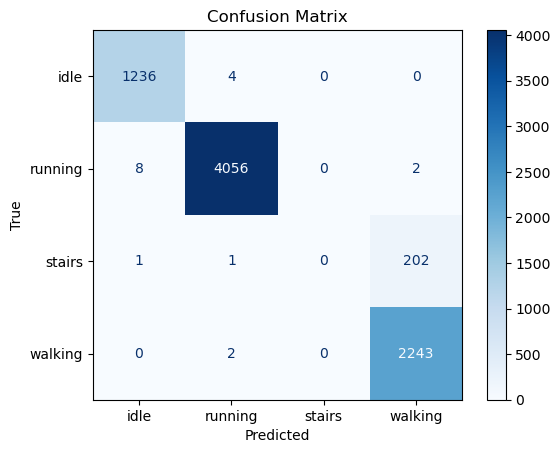

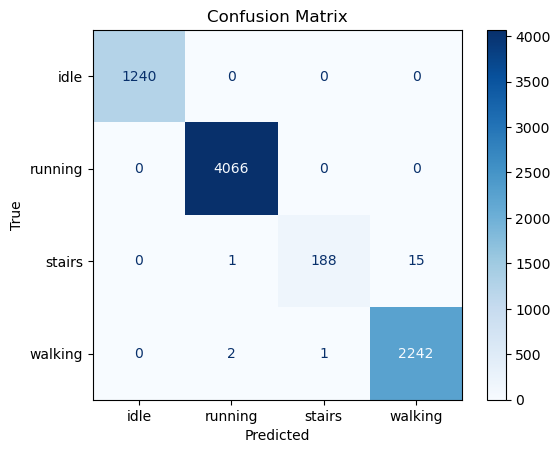

In [20]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Викликаємо функцію для SVM
plot_confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)

# Викликаємо функцію для Random Forest
plot_confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)